In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"sign_mnist_train.csv")
test = pd.read_csv(r"sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

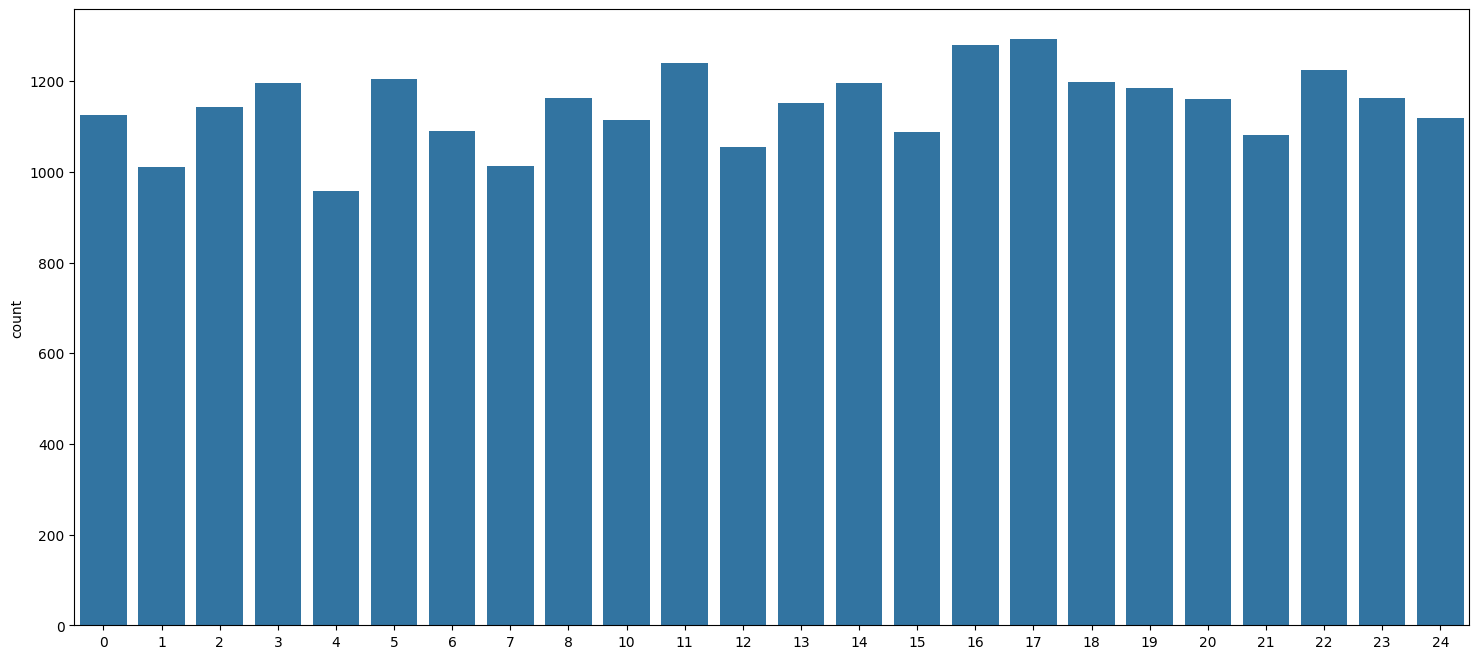

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [7]:
train.drop('label',axis = 1,inplace = True)

In [8]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


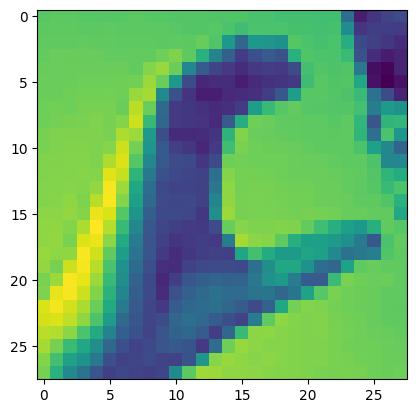

In [11]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size =0.3, random_state=101)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
x_train = x_train/255
x_test = x_test/255

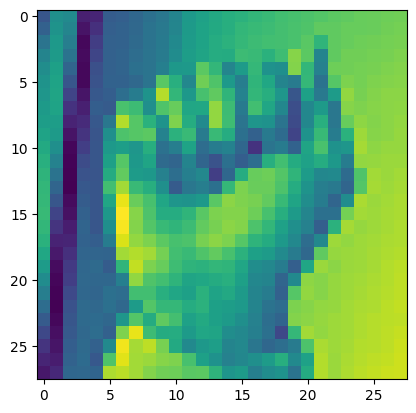

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [17]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

c:\D\college\project\py\ASL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test),epochs=epochs, batch_size= batch_size )

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.0947 - loss: 3.0271 - val_accuracy: 0.4099 - val_loss: 1.8513
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4673 - loss: 1.6012 - val_accuracy: 0.6733 - val_loss: 0.9694
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6933 - loss: 0.9121 - val_accuracy: 0.8253 - val_loss: 0.5632
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7848 - loss: 0.6314 - val_accuracy: 0.8792 - val_loss: 0.3941
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8592 - loss: 0.4283 - val_accuracy: 0.8998 - val_loss: 0.3123
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9002 - loss: 0.3119 - val_accuracy: 0.9584 - val_loss: 0.1822
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9224 - loss: 0.2407 - val_accuracy: 0.9778 - val_loss: 0.1121
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9498 - loss: 0.1654 - val_acc

In [20]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


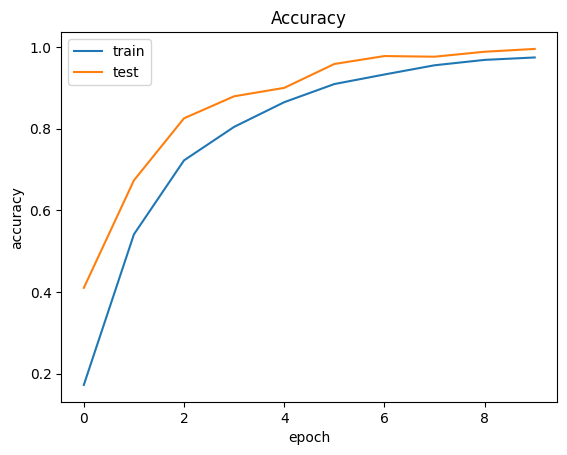

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()

In [22]:
test_labels = test['label']
test.drop('label', axis=1, inplace=True)
test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape
ypred = model.predict(test_images)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,ypred.round())

0.7378694924707194

In [24]:
def getLetter(result):
  classLabels ={
      0:'A',
      1:'B',
      2:'C',
      3:'D',
      4:'E',
      5:'F',
      6:'G',
      7:'H',
      8:'I',
      9:'K',
      10:'L',
      11:'M',
      12:'N',
      13:'O',
      14:'P',
      15:'Q',
      16:'R',
      17:'S',
      18:'T',
      19:'U',
      20:'V',
      21:'W',
      22:'X',
      23:'Y',
      24:'Z'}

  try:
    res = int(result)
    return classLabels[res]
  except:
    return Error

: 

In [ ]:
import cv2
import numpy as np
from docx import Document  # Library to work with Word files

# Initialize Word documents
english_doc = Document()
braille_doc = Document()

# Function to map identified class to Braille (this is an example, customize it)
def getBraille(character):
    # Define a simple mapping from English characters to Braille representations
    braille_map = {
        'A': '⠁', 'B': '⠃', 'C': '⠉', 'D': '⠙',
        'E': '⠑', 'F': '⠋', 'G': '⠛', 'H': '⠓',
        'I': '⠊', 'J': '⠚', 'K': '⠅', 'L': '⠇',
        'M': '⠍', 'N': '⠝', 'O': '⠕', 'P': '⠏',
        'Q': '⠟', 'R': '⠗', 'S': '⠎', 'T': '⠞',
        'U': '⠥', 'V': '⠧', 'W': '⠺', 'X': '⠭',
        'Y': '⠽', 'Z': '⠵', ' ': '⠐'
    }
    return braille_map.get(character.upper(), '?')  # Return '?' for unmapped characters

# Function to map class index to English letter
def getLetter(class_index):
    # Assuming a class index to letter mapping
    return chr(65 + int(class_index))  # A-Z for class indices 0-25

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract the region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)

    # Preprocess the ROI
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)

    # Draw rectangle on the original frame
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    # Reshape the ROI for prediction
    roi = roi.reshape(1, 28, 28, 1)
    roi = roi.astype('float32') / 255.0  # Normalize input if required by model

    # Predict using the model
    predictions = model.predict(roi, verbose=0)  # Predict probabilities
    result = np.argmax(predictions, axis=-1)[0]  # Get the predicted class index

    # Get English and Braille representation
    english_result = getLetter(result)
    braille_result = getBraille(english_result)

    # Display the result on the frame
    cv2.putText(copy, english_result, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    # Save to Word files when the user presses a specific key (e.g., 's')
    if cv2.waitKey(1) == ord('s'):
        english_doc.add_paragraph(english_result)
        braille_doc.add_paragraph(braille_result)
        print(f"Saved: English='{english_result}', Braille='{braille_result}'")

    # Break the loop when the 'Enter' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):  # 'q' key to quit
        break

cap.release()
cv2.destroyAllWindows()

# Save Word files
english_doc.save(r"English.docx")
braille_doc.save(r"Braille.docx")
print("Word files saved successfully.")
